In [1]:
import os
import urllib
import zipfile

# Download and unzip the dataset
if not os.path.isfile('.zip'):
  urllib.request.urlretrieve("https://github.com/Mouneshgouda/Dog-and-Cat-Dataset/archive/refs/heads/main.zip", "Cat Dog Data Set.zip")

zip_filename = "Cat_Dog_Dataset.zip"
with zipfile.ZipFile("Cat Dog Data Set.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Config
IMG_SIZE = 64
BATCH_SIZE = 32

# Dataset Paths (based on your GitHub repo)
train_path = "/content/Dog-and-Cat-Dataset-main/data/train"
val_path = "/content/Dog-and-Cat-Dataset-main/data/test"

# Data Loaders
train_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_data = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# MLP Model
model = Sequential([
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(train_data, epochs=5, validation_data=val_data)


Found 19989 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5468 - loss: 0.8364

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.5469 - loss: 0.8361 - val_accuracy: 0.5874 - val_loss: 0.6698
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - accuracy: 0.5894 - loss: 0.6712 - val_accuracy: 0.5772 - val_loss: 0.6761
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.5992 - loss: 0.6626 - val_accuracy: 0.6176 - val_loss: 0.6464
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.6151 - loss: 0.6493 - val_accuracy: 0.6056 - val_loss: 0.6538
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.6168 - loss: 0.6464 - val_accuracy: 0.5944 - val_loss: 0.6569


Saving ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG to ff7d08df-7fca-4a2e-a2f4-b196a19e6442___JR_B.Spot 3237.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


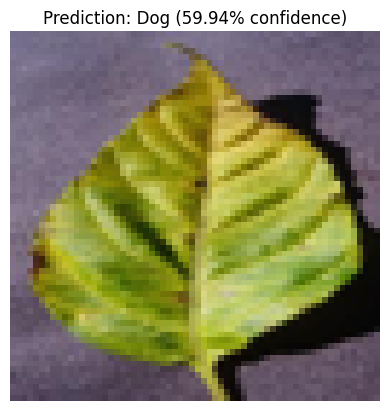

In [3]:
# Upload and Predict

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)[0][0]
    label = "Dog" if prediction > 0.5 else "Cat"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Show Result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2%} confidence)")
    plt.show()